In [35]:
#SVM rbf
from pandas import DataFrame, read_csv

#mammals = read_csv('http://bit.ly/1f2YPsC').sort('body')
museums = read_csv('/Users/nik/Documents/Nik/MIM/Data To Insights/Project/SVM R/ipData_Museums.csv')
lm = svm.SVR(kernel='linear', C=1e1)
lm_rbf = svm.SVR(kernel='rbf', C=1e1)


museums = museums[np.isfinite(museums['fs_CheckinsCount'])]

#rating = museums[ ['fs_rating'] ].values
#ratingCount = museums['fs_RatingCount']

#features_df = museums['fs_rating', 'fs_RatingCount']



checkin = np.asarray(museums['fs_CheckinsCount'])
visitors = np.asarray(museums['Visitor_per_count'])


checkin = checkin.reshape(-1,1)
visitors = visitors.reshape(-1,1)
print(checkin.shape)



print(visitors.shape)
print(len(checkin))

#fit(X,y)
#X - features
#y - label. I guess
lm.fit(checkin, visitors)
lm_rbf.fit(np.log(checkin), np.log(visitors))

## Compare to the original log fit model, as well as other svm kernels:
from sklearn.linear_model import LinearRegression
logfit = LinearRegression().fit(np.log(checkin), np.log(visitors))
#museums['log_regr'] = np.exp(logfit.predict(np.log(checkin)))
museums['linear_svm'] = lm.predict(checkin)
museums['rbf_svm'] = np.exp(lm_rbf.predict(np.log(checkin)))


(92, 1)
(92, 1)
92
(0       1.21
1       1.38
20      0.97
22      1.40
32      3.75
33      1.54
39      0.91
40      0.87
101     1.24
105     1.59
106     1.45
108     1.30
110     1.22
111     0.08
115     2.19
118     0.67
119     0.73
125     0.74
127     2.54
128     0.78
131     0.67
132     1.26
136     0.46
139     1.02
141     1.53
150     0.64
155     3.96
157     1.22
161     1.41
162     1.91
       ...  
248     3.34
252     1.25
254     2.16
255     0.84
271     6.43
279     1.39
283     1.25
285    16.23
290     5.56
294     0.83
309     0.81
312     1.61
315     0.74
316     5.41
317     3.19
318    29.20
319     0.69
328     0.72
330     1.29
333     1.25
337     1.05
374     0.87
380     0.85
383     1.45
393     1.65
399     1.15
401     0.58
413     1.38
415     1.17
416     2.62
Name: Visitor_per_count, dtype: float64, 0         1.633049
1         1.850556
20        0.154005
22        0.752148
32       33.650000
33       15.716592
39        0.328010
40        2.6

In [38]:
#print(museums['Visitor_per_count'], museums['linear_svm'], museums['rbf_svm'])

museums.to_csv('sampleSVMR.csv')

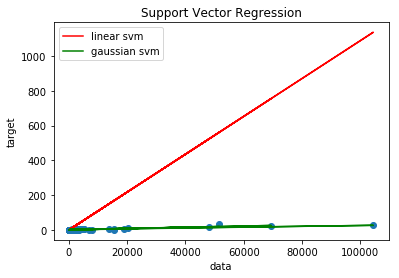

In [36]:
plt.scatter(checkin, visitors)
plt.plot(checkin, museums['linear_svm'].values, c='r', label='linear svm')
plt.plot(checkin, museums['rbf_svm'].values, c='g', label='gaussian svm')
#plt.plot(checkin, museums['log_regr'].values, c='b', label='linear regression')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(loc=2)
plt.show()

In [41]:
for prediction in ('linear_svm', 'rbf_svm'):
	print 'Mean Squared Error for', prediction, ':', metrics.mean_squared_error(museums[ [prediction] ].values, museums[ ['Visitor_per_count'] ].values)
	print 'R-Squared for', prediction, ':', metrics.r2_score(museums[ [prediction] ].values, museums[ ['Visitor_per_count'] ].values)

 Mean Squared Error for linear_svm : 27102.1681799
R-Squared for linear_svm : -0.04314364666
Mean Squared Error for rbf_svm : 2.34375893967
R-Squared for rbf_svm : 0.883865776658
